In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Описание данных

ELO - has built partnerships with merchants in order to offer promotions or discounts to cardholders

****

`train.csv` - the training set

`test.csv` - the test set

`sample_submission.csv` - a sample submission file in the correct format - contains all card_ids you are expected to predict for.

`istorical_transactions.csv` - up to 3 months' worth of historical transactions for each card_id

`merchants.csv` - additional information about all merchants / merchant_ids in the dataset.

`new_merchant_transactions.csv` - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

***

`train.csv` and `test.csv` contain card_ids and information about the card itself - the first month the card was active, etc. `train.csv` also contains the target.

`historical_transactions.csv` and `new_merchant_transactions.csv` are designed to be joined with `train.csv`, `test.csv`, and `merchants.csv`. They contain information about transactions for each card, as described above.

merchants can be joined with the transaction sets to provide additional merchant-level information.

# Загрузка данных

## Train.csv

In [3]:
df_train = pd.read_csv('data/train/train.csv', header = 0)

In [4]:
df_train.head() # посмотрим на данные

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
df_train.describe() # статистики по данным

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


Дата активации как признак и три признака типа категории с 5, 3 и 2 уровнями соответственно.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


Пропущенных данных нет

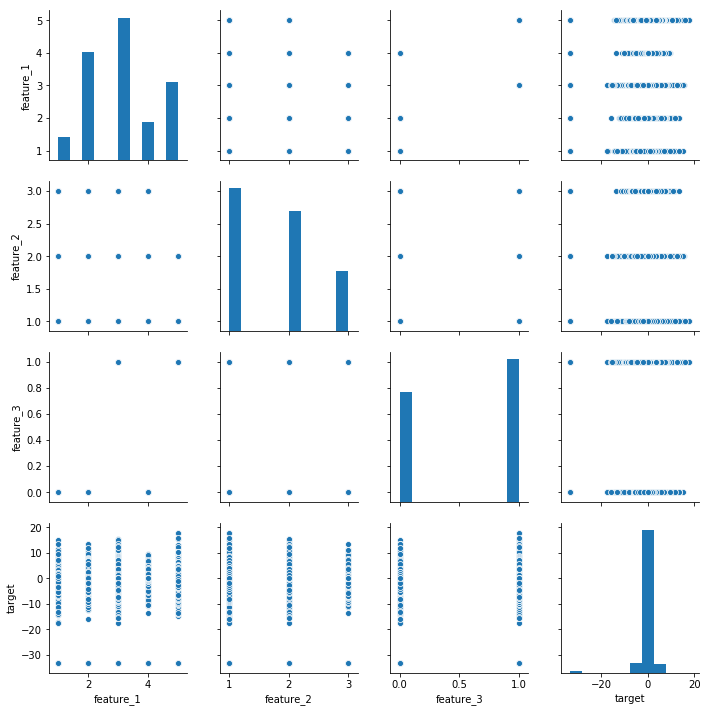

In [7]:
sns.pairplot(df_train) # посмотрим распределения признаков

Явных зависимостей признаков на целевую функцию не видно, однако есть различия в диапазонах для разных уровней категориальных признаков. Возможно, модель сможет оттуда что-то получить.

(array([2.2070e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 1.0000e+00, 6.0000e+00, 6.0000e+00, 8.0000e+00,
        4.0000e+00, 1.4000e+01, 2.9000e+01, 5.0000e+01, 1.3500e+02,
        2.5100e+02, 6.6600e+02, 1.4920e+03, 3.0540e+03, 6.7100e+03,
        1.6108e+04, 4.0764e+04, 6.9713e+04, 3.6022e+04, 1.3775e+04,
        5.9710e+03, 2.6400e+03, 1.2540e+03, 5.9500e+02, 2.5900e+02,
        8.1000e+01, 4.4000e+01, 2.1000e+01, 1.3000e+01, 6.0000e+00,
        6.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-33.21928095, -32.19559396, -31.17190698, -30.14821999,
        -29.124533  , -28.10084601, -27.07715903, -26.05347204,
        -25.02978505, -24.00609807, -22.98241108, -21.95872409,
        -20.93503711, -19.91135012, -18.88766313, -17.86397614,
        -16.84028916, -15.81660217, -14.79291518, -13.7692282 

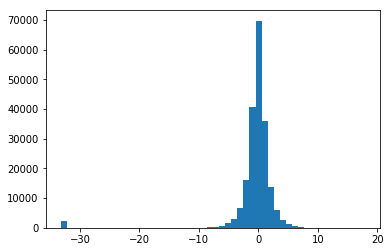

In [8]:
plt.hist(df_train.target, bins = 50) # отмасштабируем распределение целевой функции

Целвая функция имеет нормальное распределение в основной своей части.